In [1]:

import pandas as pd
import matplotlib as plt

# Load cleaned Boston Housing dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# View the first few rows
print(df.head())



      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [2]:
print(df.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [3]:
print(df.dtypes)



crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


In [4]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Finding out the correlation between the features
corr = df.corr()


In [7]:
corr.shape

(14, 14)

<Axes: >

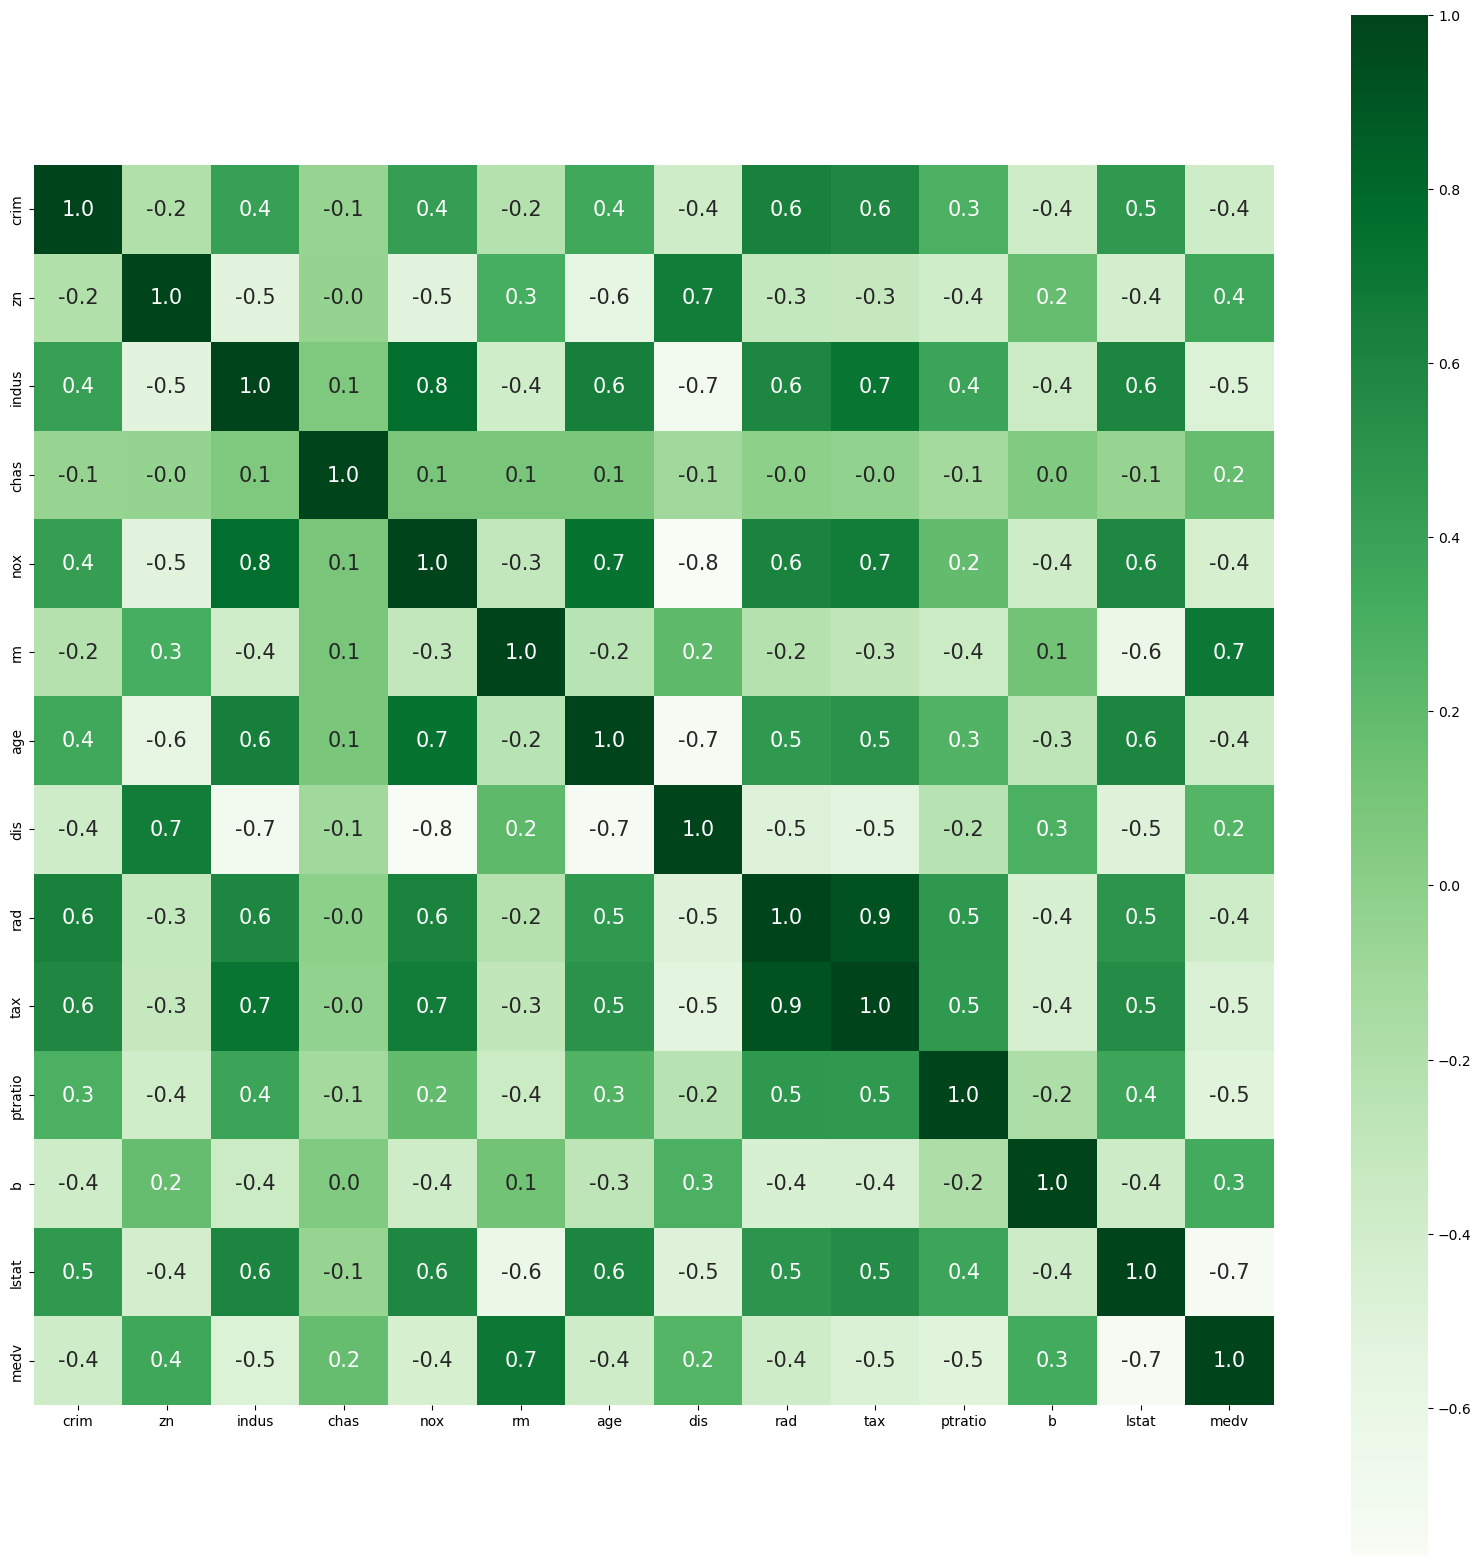

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')



In [16]:
X = df.drop("medv", axis=1)  
y = df["medv"]              


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (404, 13)
Test set size: (102, 13)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R2: 0.6687594935356322
MSE: 24.291119474973495


In [20]:
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)


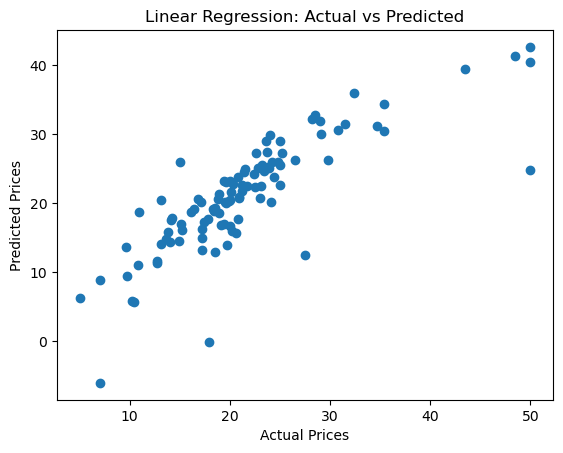

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [22]:
# Ridge Regression with Hyperparameter Tuning using GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

#  parameter grid for Ridge Regression
params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

#  grid search with 5-fold cross-validation
grid = GridSearchCV(Ridge(), param_grid=params, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)
# Get the best alpha value
best_alpha = grid.best_params_['alpha']
print("Best Ridge alpha:", best_alpha)




Best Ridge alpha: 1.0


In [23]:
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

# Evaluate model
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression R2 Score:", ridge_r2)
print("Ridge Regression MSE:", ridge_mse)


Ridge Regression R2 Score: 0.6684624359643558
Ridge Regression MSE: 24.31290383049162


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=param_grid_dt, scoring='r2', cv=5)
grid_dt.fit(X_train_scaled, y_train)

print("Best Decision Tree params:", grid_dt.best_params_)

Best Decision Tree params: {'max_depth': None, 'min_samples_split': 2}


In [25]:
# Final model
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)

print("Tuned Decision Tree R2:", dt_r2)
print("Tuned Decision Tree MSE:", dt_mse)

Tuned Decision Tree R2: 0.8579634380978161
Tuned Decision Tree MSE: 10.416078431372549


In [27]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rf, scoring='r2', cv=5)
grid_rf.fit(X_train_scaled, y_train)

print("Best Random Forest params:", grid_rf.best_params_)

Best Random Forest params: {'max_depth': None, 'n_estimators': 100}


In [29]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print("Tuned Random Forest R2:", rf_r2)
print("Tuned Random Forest MSE:", rf_mse)

Tuned Random Forest R2: 0.8920995891343227
Tuned Random Forest MSE: 7.912745333333333


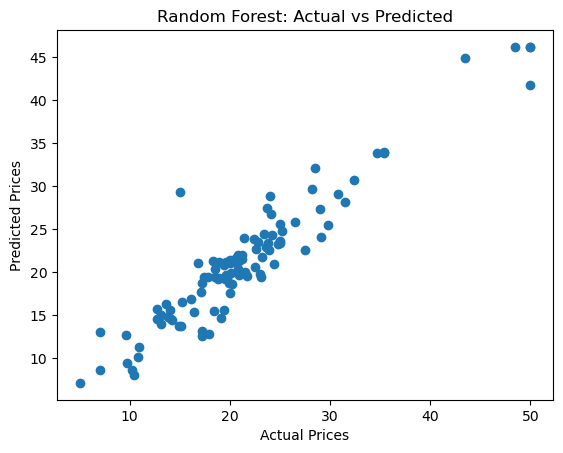

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lr, X_train_scaled, y_train, scoring='r2', cv=5)
print("Cross-validated R2:", scores.mean())


Cross-validated R2: 0.7244357342240262


In [39]:
import pandas as pd

importance = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importance})
print(importance_df.sort_values("Importance", ascending=False))


    Feature  Importance
5        rm    0.503845
12    lstat    0.309509
7       dis    0.060549
0      crim    0.038062
10  ptratio    0.016313
9       tax    0.015661
4       nox    0.015544
6       age    0.013840
11        b    0.012154
2     indus    0.007953
8       rad    0.003811
1        zn    0.001756
3      chas    0.001004


In [42]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error


In [43]:
# Linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_scaled, y_train)
y_pred_svr_linear = svr_linear.predict(X_test_scaled)

# Polynomial kernel
svr_poly = SVR(kernel='poly', degree=2)
svr_poly.fit(X_train_scaled, y_train)
y_pred_svr_poly = svr_poly.predict(X_test_scaled)

# RBF kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_scaled, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test_scaled)


In [44]:
print("SVR (Linear) R2:", r2_score(y_test, y_pred_svr_linear), " | MSE:", mean_squared_error(y_test, y_pred_svr_linear))
print("SVR (Poly) R2:", r2_score(y_test, y_pred_svr_poly), " | MSE:", mean_squared_error(y_test, y_pred_svr_poly))
print("SVR (RBF) R2:", r2_score(y_test, y_pred_svr_rbf), " | MSE:", mean_squared_error(y_test, y_pred_svr_rbf))


SVR (Linear) R2: 0.6056589279132618  | MSE: 28.91852267161814
SVR (Poly) R2: 0.4997382858027848  | MSE: 36.686084072350035
SVR (RBF) R2: 0.6499766059760035  | MSE: 25.66853967839604


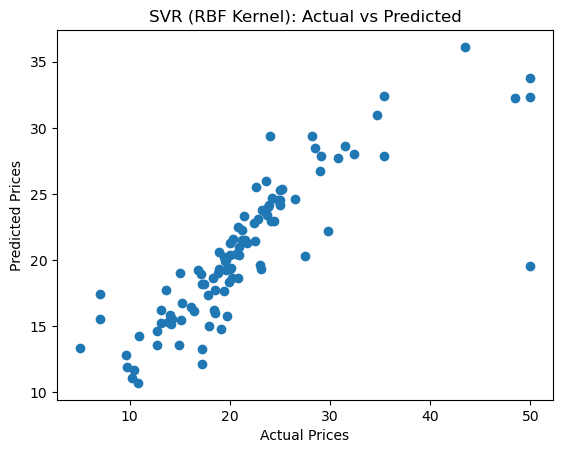

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_svr_rbf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR (RBF Kernel): Actual vs Predicted")
plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid, scoring='r2', cv=5)
grid_svr.fit(X_train_scaled, y_train)

print("Best SVR Parameters:", grid_svr.best_params_)

# Predict with best model
best_svr = grid_svr.best_estimator_
y_pred_best_svr = best_svr.predict(X_test_scaled)

print("Tuned SVR R2:", r2_score(y_test, y_pred_best_svr))
print("Tuned SVR MSE:", mean_squared_error(y_test, y_pred_best_svr))


Best SVR Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'auto'}
Tuned SVR R2: 0.8354920503211449
Tuned SVR MSE: 12.063990309898475


In [47]:
# Calculate R2 and MSE for SVR (RBF)
svr_rbf_r2 = r2_score(y_test, y_pred_best_svr)
svr_rbf_mse = mean_squared_error(y_test, y_pred_best_svr)


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd


In [49]:
from sklearn.neighbors import KNeighborsRegressor

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn, scoring='r2', cv=5)
grid_knn.fit(X_train_scaled, y_train)

print("Best KNN params:", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)

print("Tuned KNN R2:", knn_r2)
print("Tuned KNN MSE:", knn_mse)



Best KNN params: {'n_neighbors': 3, 'weights': 'distance'}
Tuned KNN R2: 0.7516375288638701
Tuned KNN MSE: 18.213359603458915


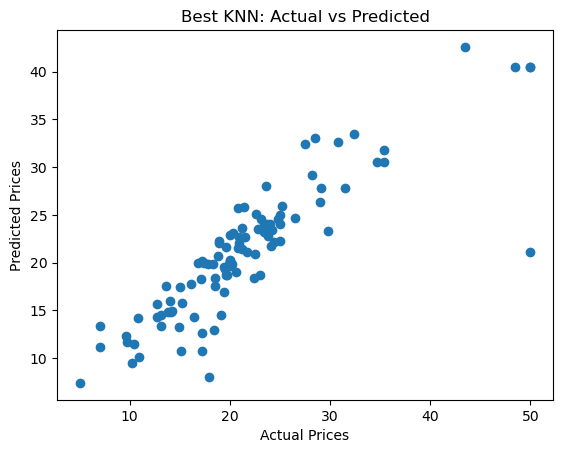

In [50]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Best KNN: Actual vs Predicted")
plt.show()


In [52]:
from sklearn.model_selection import cross_val_score

# Cross-validation R2 scores
lr_cv = cross_val_score(model_lr, X_train_scaled, y_train, scoring='r2', cv=5)
ridge_cv = cross_val_score(model_ridge, X_train_scaled, y_train, scoring='r2', cv=5)
dt_cv = cross_val_score(best_dt, X_train_scaled, y_train, scoring='r2', cv=5)
rf_cv = cross_val_score(best_rf, X_train_scaled, y_train, scoring='r2', cv=5)
svr_cv = cross_val_score(best_svr, X_train_scaled, y_train, scoring='r2', cv=5)
knn_cv = cross_val_score(best_knn, X_train_scaled, y_train, scoring='r2', cv=5)


               Model  Test R2 Score   Test MSE  Cross-Val R2
0  Linear Regression       0.668759  24.291119      0.724436
1   Ridge Regression       0.668462  24.312904      0.724514
2      Decision Tree       0.857963  10.416078      0.668764
3      Random Forest       0.892100   7.912745      0.826183
4          SVR (RBF)       0.835492  12.063990      0.887861
5                KNN       0.751638  18.213360      0.808263


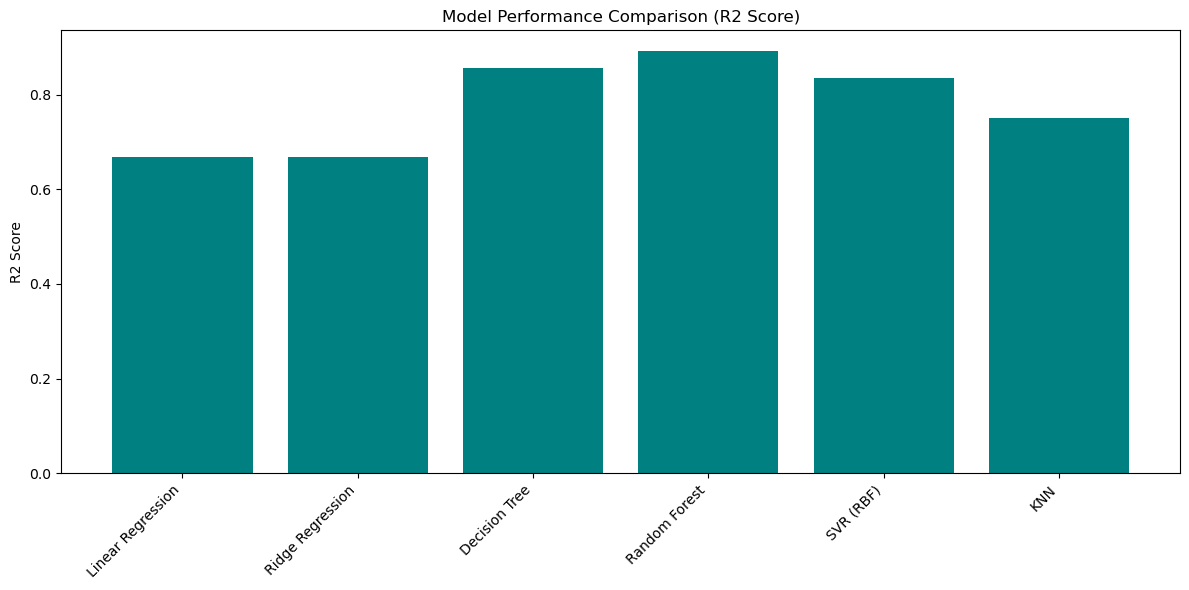

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Collect metrics
all_models = ["Linear Regression", "Ridge Regression", "Decision Tree", "Random Forest", "SVR (RBF)", "KNN", ]
r2_scores = [lr_r2, ridge_r2, dt_r2, rf_r2, svr_rbf_r2, knn_r2, ]
mse_scores = [lr_mse, ridge_mse, dt_mse, rf_mse, svr_rbf_mse, knn_mse]
cv_r2_scores = [scores.mean(), ridge_cv.mean(), dt_cv.mean(), rf_cv.mean(), svr_cv.mean(), knn_cv.mean()]  

# Create DataFrame
performance_df = pd.DataFrame({
    "Model": all_models,
    "Test R2 Score": r2_scores,
    "Test MSE": mse_scores,
    "Cross-Val R2": cv_r2_scores
})

# Display
print(performance_df)



# Bar Plot - R2 Comparison
plt.figure(figsize=(12, 6))
plt.bar(all_models, r2_scores, color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison (R2 Score)")
plt.tight_layout()
plt.show()





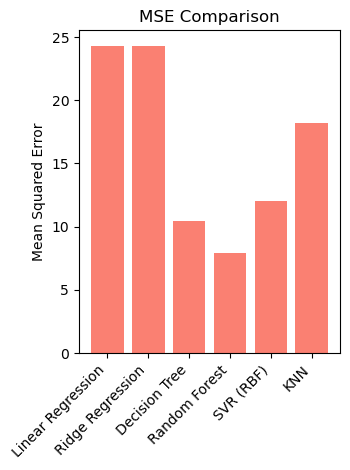

In [54]:
# MSE Plot
plt.subplot(1, 2, 2)
plt.bar(all_models, mse_scores, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison")

plt.tight_layout()
plt.show()
